### k-means 군집화: Iris 데이터 사용.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline

#### 1. 'Iris' 데이터를 Seaborn에서 가져온다.

In [2]:
df = sns.load_dataset('iris')
X = df.drop(columns=['species'])                        # Only X variables.
Y = df['species']                                       # Only Y variable.
header_X = X.columns                                    # Store the column names of X.
#df.head()
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 2. k-means 군집화 적용.

In [3]:
kmeans = KMeans(n_clusters=3, random_state=123)         # kmeans object for 3 clusters. random_state=123 means deterministic initialization.
kmeans.fit(X)                                           # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)                         # Cluster labeling result as Series.

In [4]:
# '0'이라 labeling된 관측치.
# 모두 'setosa'에 해당한다.
case0 = Y[res==0]
print(case0.value_counts())

virginica     36
versicolor     2
Name: species, dtype: int64


In [5]:
# '1'이라 labeling된 관측치.
# 대다수는 'virginica'이다.
case1 = Y[res==1]
print(case1.value_counts())

setosa    50
Name: species, dtype: int64


In [6]:
# '2'이라 labeling된 관측치.
# 대다수는 'versicolor'이다.
case2 = Y[res==2]
print(case2.value_counts())

versicolor    48
virginica     14
Name: species, dtype: int64


In [7]:
# 학습된 label 순서대로 리스트로 정리해 본다
learnedLabels = ['Setosa', 'Virginica', 'Versicolor']  

In [8]:
# 군집의 중심 (centroids) 출력.
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,index=['Cluster 0','Cluster 1','Cluster 2']),2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


#### 3. 시각화.

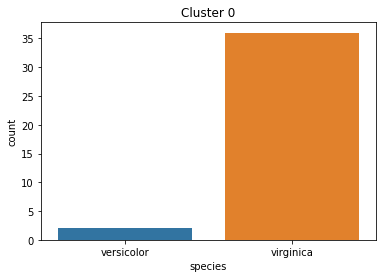

In [9]:
# 0번 군집의 내용 출력. 
sns.countplot(case0).set_title('Cluster 0')
plt.show()

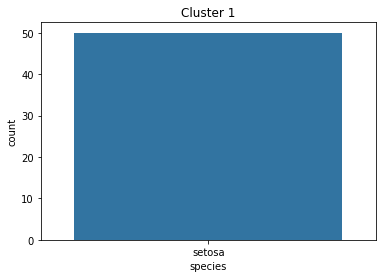

In [10]:
# 1번 군집의 내용 출력. 
sns.countplot(case1).set_title('Cluster 1')
plt.show()

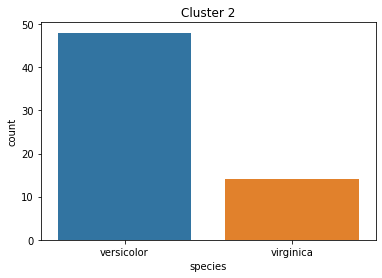

In [11]:
# 2번 군집의 내용 출력. 
sns.countplot(case2).set_title('Cluster 2')
plt.show()

#### 4. 비지도 학습 기반의 예측.

In [12]:
# X의 관측값이 주어지면 species 예측. 
# Case #1.
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 0 with the most probable label 'Setosa'


In [13]:
# Case #2.
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [1.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 1 with the most probable label 'Virginica'


In [14]:
# Case #3.
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 2 with the most probable label 'Versicolor'
